In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import math

#### Pandas数据结构
|数据结构|维数|说明|
|:--|:--|:--|
|Series|1|序列/系列；是具有均匀数据、尺寸大小不变、数据可变的一维数组结构|
|DataFrame|2|数据框/数据帧；是具有异构数据、大小可变、数据可变的二维数组结构，即数据以行和列的表格方式排列|
|Panel|3|面板；具有异构数据、大小可变、数据可变的三维数据结构|

#### Pandas创建对象
##### pd.Series对象创建
|创建函数|参数|描述|
|:--|:--|:--|
|pd.Series( data, index, dtype, copy)|data<br/>index<br/>dtype<br/>copy|数据采取各种形式，如：ndarray，list，constants，dict<br/>索引值必须是唯一的和散列的，与数据的长度相同。如果没有索引被传递默认np.arange(n)<br/>dtype用于数据类型。如果没有，将推断数据类型<br/>复制数据，默认为false|

In [2]:
# 创建简单的序列
# 创建一个空的系列
pd.Series()
# 从ndarray创建一个系列
data=np.array(['a','s','d','f'])
pd.Series(data)
pd.Series(data,index=[101,102,103,104])
# 从字典创建一个系列
data = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(data)
pd.Series(data,index=['b','c','d','a'])
# 从标量创建一个系列
pd.Series(5, index=['a','b','c','d'])

Series([], dtype: float64)

0    a
1    s
2    d
3    f
dtype: object

101    a
102    s
103    d
104    f
dtype: object

a    0.0
b    1.0
c    2.0
dtype: float64

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

a    5
b    5
c    5
d    5
dtype: int64

In [3]:
# 访问序列中数据(与访问numpy中元素一致)
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
s[0] # 等价于 s['a']
s[:3] # 等价于 s[['a','b','c']]
s[3:]
s[1:3]

1

a    1
b    2
c    3
dtype: int64

d    4
e    5
dtype: int64

b    2
c    3
dtype: int64

##### pd.DataFrame对象创建
|创建函数|参数|描述|
|:--|:--|:--|
|pd.pandas(data, index, columns, dtype, copy)|data<br/>index<br/>columns<br/>dtype<br/>copy|数据采取各种形式，如:ndarray，series，map，lists，dict，constant和另一个DataFrame<br/>对于行标签，要用于结果帧的索引是可选缺省值np.arrange(n)，如果没有传递索引值<br/>对于列标签，可选的默认语法是 - np.arange(n)。 如果没有传递索引值<br/>每列的数据类型<br/>如果默认值为False，则此命令(或任何它)用于复制数据<br/>如果默认值为False，则此命令(或任何它)用于复制数据|

In [4]:
# 创建简单的数据框
# 创建一个空的DataFrame
pd.DataFrame()
# 从列表创建DataFrame
data = [1,2,3]
pd.DataFrame(data)
data = [['Alex',10],['Bob',12],['Clarke',13]]
pd.DataFrame(data,columns=['Name','Age'],dtype=float)
'--------------------------------------------------------------------------------------------'
# 从ndarrays/Lists的字典来创建DataFrame
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
pd.DataFrame(data)
pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
'--------------------------------------------------------------------------------------------'
# 从字典列表创建数据帧DataFrame
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data,index=['first', 'second'])
pd.DataFrame(data, index=['first', 'second'], columns=list('ab'))
pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b1']) # columns可用两种方式表示
'--------------------------------------------------------------------------------------------'
# 从系列的字典来创建DataFrame
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=list('abcd'))} # index可用两种方式表示
pd.DataFrame(d)

""


,0
0,1
1,2
2,3


,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


'--------------------------------------------------------------------------------------------'

,Age,Name
0,28,Tom
1,34,Jack
2,29,Steve
3,42,Ricky


,Age,Name
rank1,28,Tom
rank2,34,Jack
rank3,29,Steve
rank4,42,Ricky


'--------------------------------------------------------------------------------------------'

,a,b,c
first,1,2,NaN
second,5,10,20.0


,a,b
first,1,2
second,5,10


,a,b1
first,1,NaN
second,5,NaN


'--------------------------------------------------------------------------------------------'

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


###### 数据框数据的索引与选取
|选择对象|方法|
|:--|:--|
|行列|df[]|
|区域|df.loc[ ]，df.iloc[ ]，df.ix[ ]|
|单元格|df.at[ ]，df.iat[ ]|


|选择方法|说明|
|:--|:--|
|loc[ ]|根据index行标签或column列名称选取|
|iloc[ ]|基于行/列的position（行数列数）|
|at[ ]|根据指定行index及列label，快速定位DataFrame的元素|
|iat[ ]|与at类似，不同的是根据position来定位的|
|ix[ ]|为loc与iloc的混合体，既支持label也支持position|

|行列选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df[ ]|一维|行维度<br/>列维度|整数切片、标签切片、<布尔数组><br/>标签索引、标签列表、Callable|

In [5]:
# df[]的例子
df = pd.DataFrame(np.random.randn(6,4), index=list('abcdef'), columns=list('ABCD'))
df[:3] #整数切片 
# df[0]、df['a']报错，不能为整数索引，必须为整数切片
df['a':'c'] #标签切片 
# df[['a','c']]错误，不能为标签列表，必须为标签切片
df[[True,True,True,False,False,False]] # 前三行（布尔数组长度等于行数）
df[df['A']>0] # A列值大于0的行
df[(df['A']>0) & (df['C']>0)] # A列值大于0，并且C列大于0的行
'--------------------------------------------------------------------------------------------'
df['A'] # 标签索引，等价于 df.A，
# df[0:3,'A'] / df['a':'c','A']错误，不能为切片，必须为索引
df[['A','C']] #标签列表
df[lambda df: df.columns[0]] # Callable

,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
b,0.639703,0.982318,-0.785517,0.708336
e,1.199448,0.555940,1.222145,-1.744408
f,0.623923,-0.388683,0.273779,0.468964


,A,B,C,D
e,1.199448,0.555940,1.222145,-1.744408
f,0.623923,-0.388683,0.273779,0.468964


'--------------------------------------------------------------------------------------------'

a   -0.897015
b    0.639703
c   -0.402066
d   -1.296602
e    1.199448
f    0.623923
Name: A, dtype: float64

,A,C
a,-0.897015,-0.589268
b,0.639703,-0.785517
c,-0.402066,-0.511191
d,-1.296602,0.488359
e,1.199448,1.222145
f,0.623923,0.273779


a   -0.897015
b    0.639703
c   -0.402066
d   -1.296602
e    1.199448
f    0.623923
Name: A, dtype: float64

|标签区域选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df.loc[]|二维|行维度<br/>列维度|标签索引、标签切片、标签列表、<布尔数组>、Callable<br/>标签索引、标签切片、标签列表、<布尔数组>、Callable|

In [6]:
# df.loc[]的例子
df.loc['a', :] # 行标签索引，等价于 df.loc['a']\df.iloc[0]
df.loc['a':'d', :] # 行标签切片 等价于df.loc['a':'b']
df.loc[['a','b','c'], :] # 行标签列表
df.loc[[True,True,True,False,False,False], :] # 前三行（布尔数组长度等于行数）
df.loc[df.A<0, :] # A列大于0的列
df.loc[df.loc[:,'A']>0, :]
df.loc[df.iloc[:,0]>0, :]
df.loc[lambda _df: _df.A > 0, :]
'--------------------------------------------------------------------------------------------'
df.loc[:, 'A'] # 列标签索引
df.loc[:, 'A':'C'] #列切片
df.loc[:, ['A','B','C']]  #列列表
df.loc[:, [True,True,True,False]] # 前三列（布尔数组长度等于行数）
df.loc[:, df.loc['a']>0] # a行大于0的列
df.loc[:, df.iloc[0]>0] # 0行大于0的列
df.loc[:, lambda _df: ['A', 'B']] #Callable
'--------------------------------------------------------------------------------------------'
df.A.loc[lambda s: s > 0] # 定位到标量元素
df.loc[['a','d'], ['A','B']] # 行列标签列表
df.loc['a':'c', 'A':'C'] # 行列标签切片
df.loc['a':'c', ['A','B']] # 混合
df.loc['a','A'] # 定位到标量元素

A   -0.897015
B   -1.883345
C   -0.589268
D    1.215273
Name: a, dtype: float64

,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571
d,-1.296602,-0.446351,0.488359,1.219049


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
c,-0.402066,0.054401,-0.511191,1.703571
d,-1.296602,-0.446351,0.488359,1.219049


,A,B,C,D
b,0.639703,0.982318,-0.785517,0.708336
e,1.199448,0.555940,1.222145,-1.744408
f,0.623923,-0.388683,0.273779,0.468964


,A,B,C,D
b,0.639703,0.982318,-0.785517,0.708336
e,1.199448,0.555940,1.222145,-1.744408
f,0.623923,-0.388683,0.273779,0.468964


,A,B,C,D
b,0.639703,0.982318,-0.785517,0.708336
e,1.199448,0.555940,1.222145,-1.744408
f,0.623923,-0.388683,0.273779,0.468964


'--------------------------------------------------------------------------------------------'

a   -0.897015
b    0.639703
c   -0.402066
d   -1.296602
e    1.199448
f    0.623923
Name: A, dtype: float64

,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,D
a,1.215273
b,0.708336
c,1.703571
d,1.219049
e,-1.744408
f,0.468964


,D
a,1.215273
b,0.708336
c,1.703571
d,1.219049
e,-1.744408
f,0.468964


,A,B
a,-0.897015,-1.883345
b,0.639703,0.982318
c,-0.402066,0.054401
d,-1.296602,-0.446351
e,1.199448,0.555940
f,0.623923,-0.388683


'--------------------------------------------------------------------------------------------'

b    0.639703
e    1.199448
f    0.623923
Name: A, dtype: float64

,A,B
a,-0.897015,-1.883345
d,-1.296602,-0.446351


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191


,A,B
a,-0.897015,-1.883345
b,0.639703,0.982318
c,-0.402066,0.054401


-0.8970154528725585

|整数选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df.iloc[]|二维|行维度<br/>列维度|整数索引、整数切片、整数列表、<布尔数组><br/>整数索引、整数切片、整数列表、<布尔数组>、Callable|

In [7]:
# df.iloc[]的例子
df.iloc[3, :] # 行整数索引 等价于df.iloc[3]
df.iloc[0:3, :] # 行整数切片 等价于df.iloc[0:3]
df.iloc[[0,2,4], :] # 行列表
df.iloc[[True,True,True,False,False,False], :] # 前三行（布尔数组长度等于行数）
#df.iloc[df['A']>0, :] #× 为什么不行呢？想不通！
#df.iloc[df.loc[:,'A']>0, :] #×
#df.iloc[df.iloc[:,0]>0, :] #×
df.iloc[lambda _df: [0, 1], :]
'--------------------------------------------------------------------------------------------'
df.iloc[:, 1] # 列索引
df.iloc[:, 0:3] # 列切片
df.iloc[:, [0,1,2]] # 列列表
df.iloc[:, [True,True,True,False]] # 前三列（布尔数组长度等于行数）
#df.iloc[:, df.loc['a']>0] #× why
#df.iloc[:, df.iloc[0]>0] #× why
df.iloc[:, lambda _df: [0, 1]]
'--------------------------------------------------------------------------------------------'
df.iloc[[0,1], [0,1,2]] # 行列索引列表
df.iloc[1:3, 0:3] # 行列索引切片
df.iloc[[0,1], 0:3] # 混合
df.iloc[1,3] #定位到标量值

A   -1.296602
B   -0.446351
C    0.488359
D    1.219049
Name: d, dtype: float64

,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
c,-0.402066,0.054401,-0.511191,1.703571
e,1.199448,0.555940,1.222145,-1.744408


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336


'--------------------------------------------------------------------------------------------'

a   -1.883345
b    0.982318
c    0.054401
d   -0.446351
e    0.555940
f   -0.388683
Name: B, dtype: float64

,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B
a,-0.897015,-1.883345
b,0.639703,0.982318
c,-0.402066,0.054401
d,-1.296602,-0.446351
e,1.199448,0.555940
f,0.623923,-0.388683


'--------------------------------------------------------------------------------------------'

,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517


,A,B,C
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517


0.7083361725183475

|混合选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df.ix[ ]|二维|行维度<br/>列维度|标签/整数索引、标签/整数切片、标签/整数列表、<布尔数组>、Callable<br/>标签/整数索引、标签/整数切片、标签/整数列表、<布尔数组>、Callable|

In [8]:
# df.ix[]的例子
df.ix[0, :] # 行整数索引
df.ix[0:3, :] # 行整数切片
df.ix[[0,1,2], :] # 行整数列表
'--------------------------------------------------------------------------------------------'
df.ix['a', :] # 行标签
df.ix['a':'c', :] # 行标签切片
df.ix[['a','b','c'], :] # 行标签列表
'--------------------------------------------------------------------------------------------'
df.ix[:, 0] # 列索引
df.ix[:, 0:3]
df.ix[:, [0,1,2]]
'--------------------------------------------------------------------------------------------'
df.ix[:, 'A'] #列标签
df.ix[:, 'A':'C']
df.ix[:, ['A','B','C']]
'--------------------------------------------------------------------------------------------'
df.ix[[0,1,2], 'A':'B'] # 行整数列表，列标签切片
df.ix[0:3, ['A','B','C']] # 行整数切片，列标签列表
df.ix['a':'d', 0:3] # 行标签切片，列整数切片
df.ix[['a','b','c'], 'A':'B'] # 行标签列表，列标签切片

D:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


A   -0.897015
B   -1.883345
C   -0.589268
D    1.215273
Name: a, dtype: float64

,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


'--------------------------------------------------------------------------------------------'

A   -0.897015
B   -1.883345
C   -0.589268
D    1.215273
Name: a, dtype: float64

,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


,A,B,C,D
a,-0.897015,-1.883345,-0.589268,1.215273
b,0.639703,0.982318,-0.785517,0.708336
c,-0.402066,0.054401,-0.511191,1.703571


'--------------------------------------------------------------------------------------------'

a   -0.897015
b    0.639703
c   -0.402066
d   -1.296602
e    1.199448
f    0.623923
Name: A, dtype: float64

,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


'--------------------------------------------------------------------------------------------'

a   -0.897015
b    0.639703
c   -0.402066
d   -1.296602
e    1.199448
f    0.623923
Name: A, dtype: float64

,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359
e,1.199448,0.555940,1.222145
f,0.623923,-0.388683,0.273779


'--------------------------------------------------------------------------------------------'

,A,B
a,-0.897015,-1.883345
b,0.639703,0.982318
c,-0.402066,0.054401


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191


,A,B,C
a,-0.897015,-1.883345,-0.589268
b,0.639703,0.982318,-0.785517
c,-0.402066,0.054401,-0.511191
d,-1.296602,-0.446351,0.488359


,A,B
a,-0.897015,-1.883345
b,0.639703,0.982318
c,-0.402066,0.054401


|单元格选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df.at[]|精确定位单元格|行维度<br/>列维度|标签索引<br/>标签索引|

In [9]:
# df.at[]的例子
df.at['a', 'A']

-0.8970154528725585

|单元格选取方法|维度|行列|操作类型|
|:--|:--|:--|:--|
|df.iat[]|精确定位单元格|行维度<br/>列维度|整数索引<br/>整数索引|

In [10]:
# df.iat[]的例子
df.iat[0, 0]

-0.8970154528725585

##### pd.Panel对象创建
|创建函数|参数|描述|
|:--|:--|:--|
|pd.Panel(data, items, major_axis, minor_axis, dtype, copy)|data<br/>items<br/>major_axis<br/>major_axis<br/>dtype<br/>copy|数据采取各种形式，如：ndarray，series，map，lists，dict，constant和另一个数据帧(DataFrame)<br/>axis=0<br/>axis=1<br/>axis=2<br/>每列的数据类型<br/>复制数据，默认 - false|

In [11]:
# 创建面板
# 从3D ndarray创建
data = np.random.rand(2,4,5)
pd.Panel(data)
# 从DataFrame对象的dict创建面板
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
data
pd.Panel(data)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 5 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 4

{'Item1':           0         1         2
 0 -0.434674 -1.516325 -1.090963
 1  1.343774 -0.143883 -0.213383
 2  0.349254  1.666228 -0.654386
 3 -1.416395 -0.913377 -0.475773, 'Item2':           0         1
 0  0.643990  0.304934
 1 -0.456729  0.210168
 2 -1.620677 -0.479168
 3  1.265655 -1.812357}

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2

#### Pandas基本属性

|属性或方法|描述|
|:--|:--|
|dtypes|返回对象的数据类型(dtype)|
|shape|返回数据框的大小|
|head()|返回前n行|
|tail()|返回最后n行|
|values|将返回底层数据作为ndarray返回|
|index|返回行索引|
|columns|返回列名称|
|axes|返回行轴标签列表。|
|empty|如果系列为空，则返回True|
|ndim|返回底层数据的维数，默认定义：1|
|size|返回基础数据中的元素数|
||||
|df.T|将数据框转置|
|sort_index|按行索引排序|
|sort_values(by='listA')|按实际值排序，按listA列值排序，其他数据参照此列变化|

In [12]:
# pandas相关属性示例
# df = pd.DataFrame({'A':np.random.randn(24)
#                   ,'B': ['A', 'B', 'C'] * 8
#                   ,'C': ['Female', 'Male', 'Male', 'Male']*6}
#                   , index=pd.date_range('20170101', periods=24))
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
df=pd.DataFrame(d)
df.dtypes
df.shape
'1--------------------------------------------------------------------------------'
df.head() # df.head(7)
df.tail()
'2--------------------------------------------------------------------------------'
df.values
df.index
df.columns
'3--------------------------------------------------------------------------------'
df.axes
df.empty
'4--------------------------------------------------------------------------------'
df.ndim
df.size
'5--------------------------------------------------------------------------------'
df[['Age','Rating']].describe
df.T
df.sort_index # 默认升序
df.sort_index(ascending=False) # 降序
# df.sort_index(axis=1) # 按列排序
df.sort_values(by=['Age','Rating']) # 按值排序

Age         int64
Name       object
Rating    float64
dtype: object

(7, 3)

'1--------------------------------------------------------------------------------'

,Age,Name,Rating
0,25,Tom,4.23
1,26,James,3.24
2,25,Ricky,3.98
3,23,Vin,2.56
4,30,Steve,3.20


,Age,Name,Rating
2,25,Ricky,3.98
3,23,Vin,2.56
4,30,Steve,3.20
5,29,Minsu,4.60
6,23,Jack,3.80


'2--------------------------------------------------------------------------------'

array([[25, 'Tom', 4.23],
       [26, 'James', 3.24],
       [25, 'Ricky', 3.98],
       [23, 'Vin', 2.56],
       [30, 'Steve', 3.2],
       [29, 'Minsu', 4.6],
       [23, 'Jack', 3.8]], dtype=object)

RangeIndex(start=0, stop=7, step=1)

Index(['Age', 'Name', 'Rating'], dtype='object')

'3--------------------------------------------------------------------------------'

[RangeIndex(start=0, stop=7, step=1),
 Index(['Age', 'Name', 'Rating'], dtype='object')]

False

'4--------------------------------------------------------------------------------'

2

21

'5--------------------------------------------------------------------------------'

<bound method NDFrame.describe of    Age  Rating
0   25    4.23
1   26    3.24
2   25    3.98
3   23    2.56
4   30    3.20
5   29    4.60
6   23    3.80>

,0,1,2,3,4,5,6
Age,25,26,25,23,30,29,23
Name,Tom,James,Ricky,Vin,Steve,Minsu,Jack
Rating,4.23,3.24,3.98,2.56,3.2,4.6,3.8


<bound method DataFrame.sort_index of    Age   Name  Rating
0   25    Tom    4.23
1   26  James    3.24
2   25  Ricky    3.98
3   23    Vin    2.56
4   30  Steve    3.20
5   29  Minsu    4.60
6   23   Jack    3.80>

,Age,Name,Rating
6,23,Jack,3.80
5,29,Minsu,4.60
4,30,Steve,3.20
3,23,Vin,2.56
2,25,Ricky,3.98
1,26,James,3.24
0,25,Tom,4.23


,Age,Name,Rating
3,23,Vin,2.56
6,23,Jack,3.80
2,25,Ricky,3.98
0,25,Tom,4.23
1,26,James,3.24
5,29,Minsu,4.60
4,30,Steve,3.20


####  Pandas描述性统计
|函数|描述|
|:--|:--|
|count()|非空观测数量|
|sum()|所有值之和|
|mean()|所有值的平均值|
|median()|所有值的中位数|
|mode()|值的模值|
|std()|值的标准偏差|
|min()|所有值中的最小值|
|max()|所有值中的最大值|
|abs()|绝对值|
|prod()|数组元素的乘积|
|cumsum()|累计总和|
|cumprod()|累计乘积|

|函数|描述|参数说明|
|:--|:--|:--|
|describe ( include= )|对数据的描述性统计信息，注意数据需要是数据类型(float,int)|include默认number 用于汇总数字列；<br/>object 汇总字符串列；<br/>all 将所有列汇总在一起|


In [13]:
# 描述性统计函数示例
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack',
     'Lee','David','Gasper','Betina','Andres']),
     'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
     'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}
df=pd.DataFrame(d)
df.count()
df.sum() # 默认axis=0
df.sum(axis=1)
'1--------------------------------------------------------------------------------'
df.mean()
df.median()
'2--------------------------------------------------------------------------------'
df.mode()
df.std()
df.max()
'3--------------------------------------------------------------------------------'
df.prod()
df.cumsum()
df[['Age','Rating']].cumprod() # abs/cumprod必须针对数值型
'4--------------------------------------------------------------------------------'
df.describe()
df.describe(include=['object'])
df.describe(include='all')

Age       12
Name      12
Rating    12
dtype: int64

Age                                                     382
Name      TomJamesRickyVinSteveMinsuJackLeeDavidGasperBe...
Rating                                                44.92
dtype: object

0     29.23
1     29.24
2     28.98
3     25.56
4     33.20
5     33.60
6     26.80
7     37.78
8     42.98
9     34.80
10    55.10
11    49.65
dtype: float64

'1--------------------------------------------------------------------------------'

Age       31.833333
Rating     3.743333
dtype: float64

Age       29.50
Rating     3.79
dtype: float64

'2--------------------------------------------------------------------------------'

,Age,Name,Rating
0,23.0,Andres,2.56
1,25.0,Betina,2.98
2,30.0,David,3.20
3,NaN,Gasper,3.24
4,NaN,Jack,3.65
5,NaN,James,3.78
6,NaN,Lee,3.80
7,NaN,Minsu,3.98
8,NaN,Ricky,4.10
9,NaN,Steve,4.23


Age       9.232682
Rating    0.661628
dtype: float64

Age        51
Name      Vin
Rating    4.8
dtype: object

'3--------------------------------------------------------------------------------'

Age       7.158408e+17
Rating    6.320128e+06
dtype: float64

,Age,Name,Rating
0,25,Tom,4.23
1,51,TomJames,7.47
2,76,TomJamesRicky,11.45
3,99,TomJamesRickyVin,14.01
4,129,TomJamesRickyVinSteve,17.21
5,158,TomJamesRickyVinSteveMinsu,21.81
6,181,TomJamesRickyVinSteveMinsuJack,25.61
7,215,TomJamesRickyVinSteveMinsuJackLee,29.39
8,255,TomJamesRickyVinSteveMinsuJackLeeDavid,32.37
9,285,TomJamesRickyVinSteveMinsuJackLeeDavidGasper,37.17


,Age,Rating
0,2.500000e+01,4.230000e+00
1,6.500000e+02,1.370520e+01
2,1.625000e+04,5.454670e+01
3,3.737500e+05,1.396395e+02
4,1.121250e+07,4.468465e+02
5,3.251625e+08,2.055494e+03
6,7.478738e+09,7.810877e+03
7,2.542771e+11,2.952512e+04
8,1.017108e+13,8.798485e+04
9,3.051325e+14,4.223273e+05


'4--------------------------------------------------------------------------------'

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


,Name
count,12
unique,12
top,Lee
freq,1


,Age,Name,Rating
count,12.000000,12,12.000000
unique,NaN,12,NaN
top,NaN,Lee,NaN
freq,NaN,1,NaN
mean,31.833333,NaN,3.743333
std,9.232682,NaN,0.661628
min,23.000000,NaN,2.560000
25%,25.000000,NaN,3.230000
50%,29.500000,NaN,3.790000
75%,35.500000,NaN,4.132500


#### Pandas统计函数
|函数|描述|
|:--|:--|
|pct_change()|函数将每个元素与其前一个元素进行比较，并计算变化百分比|
|cov ( )|cov用来计算序列对象之间的协方差,NA将被自动排除|
|corr ( )|相关性显示了任何两个数值(系列)之间的线性关系，计算pearson(默认)，spearman和kendall之间的相关性|
|rank ( )|数据排名为元素数组中的每个元素生成排名|

In [14]:
# 统计函数示例
df = pd.DataFrame(np.random.randn(4, 2))
df.pct_change() # 行df.pct_change(axis=1)
'1--------------------------------------------------------------------------------'
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
s1.cov(s2)
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
df['a'].cov(df['b'])
df.cov() # cov()计算所有列之间的协方差值
'2--------------------------------------------------------------------------------'
df['a'].corr(df['b'])
df.corr()  # 计算所有列之间的相关系数
'3--------------------------------------------------------------------------------'
df.rank()

,0,1
0,NaN,NaN
1,-1.599659,0.390988
2,1.791461,-0.938851
3,-2.746943,4.785401


'1--------------------------------------------------------------------------------'

-0.12117368605285425

0.02248553586668352

,a,b,c,d,e
a,0.201676,0.022486,-0.053950,0.249407,-0.171799
b,0.022486,0.370753,0.072438,0.362195,-0.123009
c,-0.053950,0.072438,1.018886,0.151529,0.325987
d,0.249407,0.362195,0.151529,1.893329,-0.448767
e,-0.171799,-0.123009,0.325987,-0.448767,0.951633


'2--------------------------------------------------------------------------------'

0.08223070280618396

,a,b,c,d,e
a,1.000000,0.082231,-0.119014,0.403617,-0.392157
b,0.082231,1.000000,0.117859,0.432302,-0.207091
c,-0.119014,0.117859,1.000000,0.109098,0.331056
d,0.403617,0.432302,0.109098,1.000000,-0.334328
e,-0.392157,-0.207091,0.331056,-0.334328,1.000000


'3--------------------------------------------------------------------------------'

,a,b,c,d,e
0,3.0,9.0,2.0,6.0,5.0
1,7.0,10.0,9.0,9.0,9.0
2,1.0,3.0,4.0,2.0,4.0
3,4.0,7.0,10.0,7.0,6.0
4,10.0,4.0,8.0,4.0,2.0
5,8.0,5.0,3.0,1.0,7.0
6,9.0,6.0,1.0,10.0,1.0
7,6.0,2.0,7.0,5.0,8.0
8,2.0,1.0,6.0,3.0,10.0
9,5.0,8.0,5.0,8.0,3.0


#### Pandas字符串和文本函数
|函数|函数作用|
|:--|:--|
|lower()|将Series/Index中的字符串转换为小写。|
|upper()|将Series/Index中的字符串转换为大写。|
|len()|计算字符串长度。|
|strip()|帮助从两侧的系列/索引中的每个字符串中删除空格(包括换行符)。|
|split(' ')|用给定的模式拆分每个字符串。|
|cat(sep=' ')|使用给定的分隔符连接系列/索引元素。|
|get_dummies()|返回具有单热编码值的数据帧(DataFrame)。|
|contains(pattern)|如果元素中包含子字符串，则返回每个元素的布尔值True，否则为False。|
|replace(a,b)|将值a替换为值b。|
|repeat(value)|重复每个元素指定的次数。|
|count(pattern)|返回模式中每个元素的出现总数。|
|startswith(pattern)|如果系列/索引中的元素以模式开始，则返回true。|
|endswith(pattern)|如果系列/索引中的元素以模式结束，则返回true。|
|find(pattern)|返回模式第一次出现的位置。|
|findall(pattern)|返回模式的所有出现的列表。|
|swapcase|变换字母大小写。|
|islower()|检查系列/索引中每个字符串中的所有字符是否小写，返回布尔值|
|isupper()|检查系列/索引中每个字符串中的所有字符是否大写，返回布尔值|
|isnumeric()|检查系列/索引中每个字符串中的所有字符是否为数字，返回布尔值。|

In [4]:
# 字符串和文本函数示例
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack']),
     'Age':pd.Series([25,26,25,23,30,29,23]),
     'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
df=pd.DataFrame(d)
df['Name'].str.lower()
df['Name'].str.upper()
df['Name'].str.len()
(df.sort_values(by='Age'))['Name'].str.cat(sep='->')
df['Name'].str.contains('')
df['Name'].str.replace('a','#')
df['Name'].str.repeat(2)
df['Name'].str.count('m')
df['Name'].str.startswith('T')
df['Name'].str.find('m')
df['Name'].str.findall('m')
df['Name'].str.swapcase()
df['Name'].str.isupper()
df['Name'].str.isnumeric()

0      tom
1    james
2    ricky
3      vin
4    steve
5    minsu
6     jack
Name: Name, dtype: object

0      TOM
1    JAMES
2    RICKY
3      VIN
4    STEVE
5    MINSU
6     JACK
Name: Name, dtype: object

0    3
1    5
2    5
3    3
4    5
5    5
6    4
Name: Name, dtype: int64

'Vin->Jack->Tom->Ricky->James->Minsu->Steve'

0    True
1    True
2    True
3    True
4    True
5    True
6    True
Name: Name, dtype: bool

0      Tom
1    J#mes
2    Ricky
3      Vin
4    Steve
5    Minsu
6     J#ck
Name: Name, dtype: object

0        TomTom
1    JamesJames
2    RickyRicky
3        VinVin
4    SteveSteve
5    MinsuMinsu
6      JackJack
Name: Name, dtype: object

0    1
1    1
2    0
3    0
4    0
5    0
6    0
Name: Name, dtype: int64

0     True
1    False
2    False
3    False
4    False
5    False
6    False
Name: Name, dtype: bool

0    2
1    2
2   -1
3   -1
4   -1
5   -1
6   -1
Name: Name, dtype: int64

0    [m]
1    [m]
2     []
3     []
4     []
5     []
6     []
Name: Name, dtype: object

0      tOM
1    jAMES
2    rICKY
3      vIN
4    sTEVE
5    mINSU
6     jACK
Name: Name, dtype: object

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Name, dtype: bool

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Name, dtype: bool

#### Pandas窗口函数与聚合函数
|函数|函数作用|
|:--|:--|
|df.rolling( window=n )|指定window=n参数并在其上应用适当的统计函数,前n-1个元素有空值，第n个元素的值将是n，n-1….0个元素的统计函数值|
|df.expanding( min_periods=n )|指定min_periods=n参数并在其上应用适当的统计函数，与rolling函数功能相似|
|df.aggregate( np.sum )|在整个数据框上应用聚合\单个列上应用聚合\多列上应用聚合\单个列上应用多个函数\多列上应用多个函数|


In [10]:
# 窗口函数
df = pd.DataFrame(np.random.randn(10, 4),index = pd.date_range('1/1/2020', periods=10),columns = ['A', 'B', 'C', 'D'])
df.rolling(window=4).mean()
df.expanding(min_periods=3).mean()
'---------------------------------------------------------------------------'
# 聚合函数
df1=df.rolling(window=3,min_periods=1)
df1.aggregate(np.sum) #在整个数据框上应用聚合
df1['A'].aggregate(np.sum) # 在数据框的单个列上应用聚合
df1[['A','C']].aggregate(np.sum) # 在DataFrame的多列上应用聚合
df1['A'].aggregate([np.sum,np.mean]) # 在DataFrame的单个列上应用多个函数
df1[['A','C']].aggregate([np.sum,np.mean]) # 在DataFrame的多列上应用多个函数 
df1.aggregate({'A' : np.sum,'B' : np.mean}) # 将不同的函数应用于DataFrame的不同列

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,0.072847,0.625421,-0.321718,-0.286368
2020-01-05,-0.111957,0.589124,-0.955854,-0.709480
2020-01-06,-0.785411,1.143256,-0.521317,-0.302849
2020-01-07,-0.662634,0.507758,-0.407731,-0.527692
2020-01-08,0.115185,0.596837,-0.579141,-0.239076
2020-01-09,0.245764,0.085004,-0.170510,0.295653
2020-01-10,0.627896,-0.273199,-0.122880,0.188302


,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.879951,0.437257,-0.767225,-0.045709
2020-01-04,0.072847,0.625421,-0.321718,-0.286368
2020-01-05,0.269547,0.644470,-0.466433,-0.504114
2020-01-06,-0.051696,0.680689,-0.491277,-0.303636
2020-01-07,-0.001526,0.477544,-0.561800,-0.321128
2020-01-08,0.094016,0.611129,-0.450430,-0.262722
2020-01-09,0.258977,0.395819,-0.334912,-0.148662
2020-01-10,0.220141,0.299134,-0.343918,-0.106861


'---------------------------------------------------------------------------'

,A,B,C,D
2020-01-01,1.795565,0.865853,1.491254,0.317351
2020-01-02,2.831468,-0.488887,-0.862395,-0.610418
2020-01-03,2.639853,1.311772,-2.301674,-0.137128
2020-01-04,-1.504176,1.635833,-2.778127,-1.462824
2020-01-05,-1.483733,3.711238,-1.469768,-1.910150
2020-01-06,-2.950030,2.772365,-0.645988,-1.684687
2020-01-07,-0.302073,0.841119,-2.645727,-1.102421
2020-01-08,-0.595606,1.666682,-1.271275,0.418790
2020-01-09,2.640971,-0.521768,-0.066542,0.483859
2020-01-10,2.212092,-0.351465,0.493420,1.179287


2020-01-01    1.795565
2020-01-02    2.831468
2020-01-03    2.639853
2020-01-04   -1.504176
2020-01-05   -1.483733
2020-01-06   -2.950030
2020-01-07   -0.302073
2020-01-08   -0.595606
2020-01-09    2.640971
2020-01-10    2.212092
Freq: D, Name: A, dtype: float64

,A,C
2020-01-01,1.795565,1.491254
2020-01-02,2.831468,-0.862395
2020-01-03,2.639853,-2.301674
2020-01-04,-1.504176,-2.778127
2020-01-05,-1.483733,-1.469768
2020-01-06,-2.950030,-0.645988
2020-01-07,-0.302073,-2.645727
2020-01-08,-0.595606,-1.271275
2020-01-09,2.640971,-0.066542
2020-01-10,2.212092,0.493420


,sum,mean
2020-01-01,1.795565,1.795565
2020-01-02,2.831468,1.415734
2020-01-03,2.639853,0.879951
2020-01-04,-1.504176,-0.501392
2020-01-05,-1.483733,-0.494578
2020-01-06,-2.950030,-0.983343
2020-01-07,-0.302073,-0.100691
2020-01-08,-0.595606,-0.198535
2020-01-09,2.640971,0.880324
2020-01-10,2.212092,0.737364


A                   C          
                 sum      mean       sum      mean
2020-01-01  1.795565  1.795565  1.491254  1.491254
2020-01-02  2.831468  1.415734 -0.862395 -0.431197
2020-01-03  2.639853  0.879951 -2.301674 -0.767225
2020-01-04 -1.504176 -0.501392 -2.778127 -0.926042
2020-01-05 -1.483733 -0.494578 -1.469768 -0.489923
2020-01-06 -2.950030 -0.983343 -0.645988 -0.215329
2020-01-07 -0.302073 -0.100691 -2.645727 -0.881909
2020-01-08 -0.595606 -0.198535 -1.271275 -0.423758
2020-01-09  2.640971  0.880324 -0.066542 -0.022181
2020-01-10  2.212092  0.737364  0.493420  0.164473

,A,B
2020-01-01,1.795565,0.865853
2020-01-02,2.831468,-0.244444
2020-01-03,2.639853,0.437257
2020-01-04,-1.504176,0.545278
2020-01-05,-1.483733,1.237079
2020-01-06,-2.950030,0.924122
2020-01-07,-0.302073,0.280373
2020-01-08,-0.595606,0.555561
2020-01-09,2.640971,-0.173923
2020-01-10,2.212092,-0.117155


#### Pandas分组（GroupBy）

In [38]:
# 分组函数示例
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
# 将数据拆分成组
df.groupby('Team').groups
df.groupby(['Team','Year']).groups # 查看分组
df.groupby('Year').get_group(2014) # 选择一个分组

# 聚合
df.groupby('Year')['Points'].agg(np.mean) # 每个组返回单个聚合值
df.groupby('Team').agg(np.size) # 查看每个分组的大小
df1=df.groupby('Team')
df1['Points'].agg([np.sum, np.mean, np.std]) # 一次应用多个聚合函数

# 过滤
df.groupby('Team').filter(lambda x: len(x) >= 4)

{'Devils': Int64Index([2, 3], dtype='int64'),
 'Kings': Int64Index([4, 6, 7], dtype='int64'),
 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'),
 'Royals': Int64Index([9, 10], dtype='int64'),
 'kings': Int64Index([5], dtype='int64')}

{('Devils', 2014): Int64Index([2], dtype='int64'),
 ('Devils', 2015): Int64Index([3], dtype='int64'),
 ('Kings', 2014): Int64Index([4], dtype='int64'),
 ('Kings', 2016): Int64Index([6], dtype='int64'),
 ('Kings', 2017): Int64Index([7], dtype='int64'),
 ('Riders', 2014): Int64Index([0], dtype='int64'),
 ('Riders', 2015): Int64Index([1], dtype='int64'),
 ('Riders', 2016): Int64Index([8], dtype='int64'),
 ('Riders', 2017): Int64Index([11], dtype='int64'),
 ('Royals', 2014): Int64Index([9], dtype='int64'),
 ('Royals', 2015): Int64Index([10], dtype='int64'),
 ('kings', 2015): Int64Index([5], dtype='int64')}

,Points,Rank,Team,Year
0,876,1,Riders,2014
2,863,2,Devils,2014
4,741,3,Kings,2014
9,701,4,Royals,2014


Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

,Points,Rank,Year
Team,,,
Devils,2,2,2
Kings,3,3,3
Riders,4,4,4
Royals,2,2,2
kings,1,1,1


,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
8,694,2,Riders,2016
11,690,2,Riders,2017


#### Pandas合并/连接
|pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)|
|:--|
|left - 一个DataFrame对象。|
|right - 另一个DataFrame对象。|
|on - 列(名称)连接，必须在左和右DataFrame对象中存在(找到)。|
|left_on - 左侧DataFrame中的列用作键，可以是列名或长度等于DataFrame长度的数组。|
|right_on - 来自右的DataFrame的列作为键，可以是列名或长度等于DataFrame长度的数组。|
|left_index - 如果为True，则使用左侧DataFrame中的索引(行标签)作为其连接键。 在具有MultiIndex(分层)的DataFrame的情况下，级别的数量必须与来自右DataFrame的连接键的数量相匹配。|
|right_index - 与右DataFrame的left_index具有相同的用法。|
|how - 它是left, right, outer以及inner之中的一个，默认为内inner。 下面将介绍每种方法的用法。|
|sort - 按照字典顺序通过连接键对结果DataFrame进行排序。默认为True，设置为False时，在很多情况下大大提高性能。|

In [8]:
# merge函数示例
leftdata = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
rightdata = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
pd.merge(leftdata,rightdata,on='id') # 在一个键上合并两个数据帧
pd.merge(leftdata,rightdata,on=['id','subject_id']) #合并多个键上的两个数据框
pd.merge(leftdata,rightdata,on='subject_id',how='left') # Left Join示例
pd.merge(leftdata,rightdata,on='subject_id',how='right') # Right Join示例
pd.merge(leftdata,rightdata,on='subject_id',how='inner') # Inner Join示例
pd.merge(leftdata,rightdata,on='subject_id',how='outer') # Outer Join示例

,Name_x,id,subject_id_x,Name_y,subject_id_y
0,Alex,1,sub1,Billy,sub2
1,Amy,2,sub2,Brian,sub4
2,Allen,3,sub4,Bran,sub3
3,Alice,4,sub6,Bryce,sub6
4,Ayoung,5,sub5,Betty,sub5


,Name_x,id,subject_id,Name_y
0,Alice,4,sub6,Bryce
1,Ayoung,5,sub5,Betty


,Name_x,id_x,subject_id,Name_y,id_y
0,Alex,1,sub1,NaN,NaN
1,Amy,2,sub2,Billy,1.0
2,Allen,3,sub4,Brian,2.0
3,Alice,4,sub6,Bryce,4.0
4,Ayoung,5,sub5,Betty,5.0


,Name_x,id_x,subject_id,Name_y,id_y
0,Amy,2.0,sub2,Billy,1
1,Allen,3.0,sub4,Brian,2
2,Alice,4.0,sub6,Bryce,4
3,Ayoung,5.0,sub5,Betty,5
4,NaN,NaN,sub3,Bran,3


,Name_x,id_x,subject_id,Name_y,id_y
0,Amy,2,sub2,Billy,1
1,Allen,3,sub4,Brian,2
2,Alice,4,sub6,Bryce,4
3,Ayoung,5,sub5,Betty,5


,Name_x,id_x,subject_id,Name_y,id_y
0,Alex,1.0,sub1,NaN,NaN
1,Amy,2.0,sub2,Billy,1.0
2,Allen,3.0,sub4,Brian,2.0
3,Alice,4.0,sub6,Bryce,4.0
4,Ayoung,5.0,sub5,Betty,5.0
5,NaN,NaN,sub3,Bran,3.0


#### Pandas级联函数
|函数|函数形式|参数解释|
|:--|:--|:--|
|concat ( )|pd.concat ( objs,axis=0,join='outer',join_axes=None,ignore_index=False )|bjs - 这是Series，DataFrame或Panel对象的序列或映射<br/>axis - {0，1，...}，默认为0，这是连接的轴<br/>join - {'inner', 'outer'}，默认inner，如何处理其他轴上的索引，联合的外部和交叉的内部<br/>ignore_index − 布尔值，默认为False。如果指定为True，结果轴将被标记为：0，...，n-1<br/>join_axes - 这是Index对象的列表，用于其他(n-1)轴的特定索引，而不是执行内部/外部集逻辑|
|append ( )|append ( [object ] )|object - 数据框对象|

In [32]:
# 级联函数示例
df1 = pd.DataFrame({'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                    'subject_id':['sub1','sub2','sub4','sub6','sub5'],
                    'Marks_scored':[98,90,87,69,78]},index=[1,2,3,4,5])
df2 = pd.DataFrame({'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                    'subject_id':['sub2','sub4','sub3','sub6','sub5'],
                    'Marks_scored':[89,80,79,97,88]},index=[1,2,3,4,5])
pd.concat([df1,df2])
pd.concat([df1,df2],keys=['a','b']) # 特定的键与每个碎片的DataFrame关联起来,用键参数
pd.concat([df1,df2],keys=['a','b'],ignore_index=True) # 生成不重复的自然索引，设置ignore_index参数
pd.concat([df1,df2],axis=1) # 按横轴链接元素

df1.append([df2,df1,df1[1:3]]) # append函数可带多个参数

,Marks_scored,Name,subject_id
1,98,Alex,sub1
2,90,Amy,sub2
3,87,Allen,sub4
4,69,Alice,sub6
5,78,Ayoung,sub5
1,89,Billy,sub2
2,80,Brian,sub4
3,79,Bran,sub3
4,97,Bryce,sub6
5,88,Betty,sub5


Marks_scored    Name subject_id
a 1            98    Alex       sub1
  2            90     Amy       sub2
  3            87   Allen       sub4
  4            69   Alice       sub6
  5            78  Ayoung       sub5
b 1            89   Billy       sub2
  2            80   Brian       sub4
  3            79    Bran       sub3
  4            97   Bryce       sub6
  5            88   Betty       sub5

,Marks_scored,Name,subject_id
0,98,Alex,sub1
1,90,Amy,sub2
2,87,Allen,sub4
3,69,Alice,sub6
4,78,Ayoung,sub5
5,89,Billy,sub2
6,80,Brian,sub4
7,79,Bran,sub3
8,97,Bryce,sub6
9,88,Betty,sub5


,Marks_scored,Name,subject_id,Marks_scored,Name,subject_id
1,98,Alex,sub1,89,Billy,sub2
2,90,Amy,sub2,80,Brian,sub4
3,87,Allen,sub4,79,Bran,sub3
4,69,Alice,sub6,97,Bryce,sub6
5,78,Ayoung,sub5,88,Betty,sub5


,Marks_scored,Name,subject_id
1,98,Alex,sub1
2,90,Amy,sub2
3,87,Allen,sub4
4,69,Alice,sub6
5,78,Ayoung,sub5
1,89,Billy,sub2
2,80,Brian,sub4
3,79,Bran,sub3
4,97,Bryce,sub6
5,88,Betty,sub5


#### Pandas日期时间函数
|函数|函数作用|
|:--|:--|
|pd.datetime.now( )|用于获取当前的日期和时间|
|pd.Timestamp( )|创建一个时间戳|
|pd.to_datetime( [date1,date2,…. ] )|转换为时间戳|
|pd.date_range( start_date, end_date ,freq=' ' ).time|创建一个时间范围|
|pd.date_range( date, periods=int_number )|创建日期序列|
|pd.date_range( date, periods=int_number, freq='M' )|更改日期频率|
|pd.bdate_range( date, periods=int_number )|用来创建商业日期范围，不包括周六和周天|

|偏移别名|描述说明|偏移别名|描述说明|
|:--|:--|:--|:--|
|B|工作日频率|H|小时频率|
|BQS|商务季度开始频率|MS|月起始频率|
|D|日历/自然日频率|T, min|分钟的频率|
|A|年度(年)结束频率|SMS|SMS半开始频率|
|W|每周频率|S|秒频率|
|BA|商务年底结束|BMS|商务月开始频率|
|M|月结束频率|L, ms|毫秒|
|BAS|商务年度开始频率|Q|季度结束频率|
|SM|半月结束频率|U, us|微秒|
|BH|商务时间频率|BQ|商务季度结束频率|
|SM|半月结束频率|N|纳秒|
|BH|商务时间频率|BQ|商务季度结束频率|
|BM|商务月结束频率|QS|季度开始频率|

In [40]:
# 时间函数示例
pd.datetime.now() 
pd.Timestamp('2018-12-20')
pd.Timestamp(1588612345,unit='s')
pd.date_range("12:00", "23:59", freq="H").time
pd.to_datetime(['Jul 31, 2009','2019-10-10','2009/11/23', '2019.12.31', None])

# 日期函数示例
pd.date_range('2018/11/21', periods=5)
pd.date_range('2018/11/21', periods=5,freq='M')
pd.bdate_range('2018/12/21', periods=5) # 表示商业日期范围,除去周六周天

datetime.datetime(2018, 12, 21, 14, 20, 25, 4339)

Timestamp('2018-12-20 00:00:00')

Timestamp('2020-05-04 17:12:25')

array([datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

DatetimeIndex(['2009-07-31', '2019-10-10', '2009-11-23', '2019-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31'],
              dtype='datetime64[ns]', freq='M')

DatetimeIndex(['2018-12-21', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27'],
              dtype='datetime64[ns]', freq='B')

#### Pandas分类构造函数
|函数|函数作用|
|:--|:--|
|pd.Categorical(values, categories, ordered)|创建一个类别对象|


In [22]:
# 分类对象多种创建方式
pd.Series(["a","b","c","a"], dtype="category") # dtype指定为“category”
pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'],ordered=True) # 标准Pandas分类构造函数

cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat":cat, "s":["a", "c", "c", np.nan]})
df.describe()
df["cat"].describe() # 使用分类数据上的.describe()命令

cat.ordered # obj.ordered命令用于获取对象的顺序
cat.categories = ["Group %s" % g for g in cat.categories] # series.cat.categories属性来完成重命名类别
cat.add_categories([4]) # 使用Categorical.add.categories()方法，可以追加新的类别
cat.remove_categories("Group a") # 使用Categorical.remove_categories()方法，可以删除类别

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

[a, b, c, a, b, c]
Categories (3, object): [a < b < c]

,cat,s
count,3,3
unique,2,2
top,c,c
freq,2,2


count     3
unique    2
top       c
freq      2
Name: cat, dtype: object

False

[Group a, Group c, Group c, NaN]
Categories (4, object): [Group b, Group a, Group c, 4]

[NaN, Group c, Group c, NaN]
Categories (2, object): [Group b, Group c]

#### Pandas可视化
|绘图函数|图形|
|:--|:--|
|plot( )|绘图|
|plot.bar()或plot.barh()|条形图|
|plot.hist()|直方图|
|plot.box()|盒型图|
|plot.area()|面积|
|plot.scatter(x=,y=)|散点图|
|plot.pie( )|饼状图|

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F944E80>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F418128>],
      dtype=object)

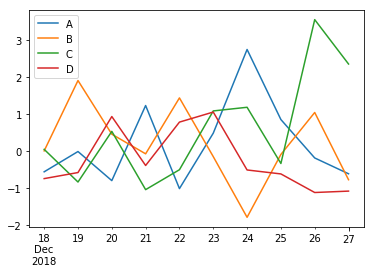

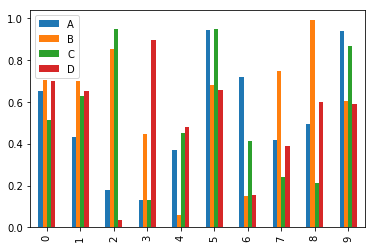

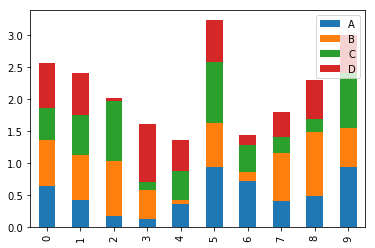

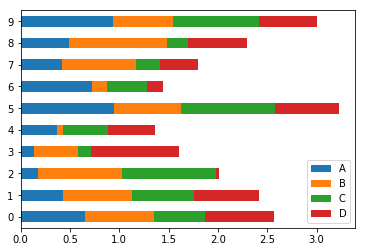

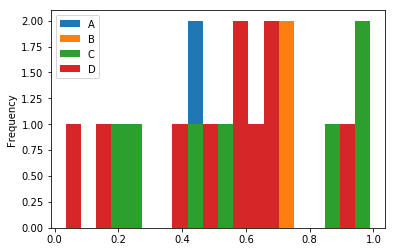

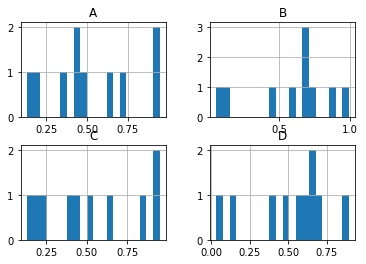

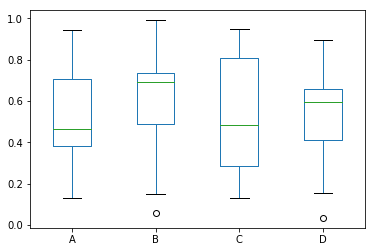

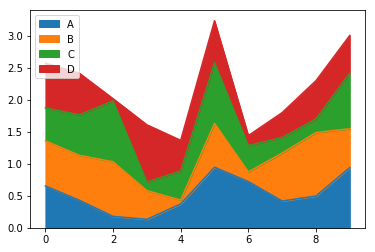

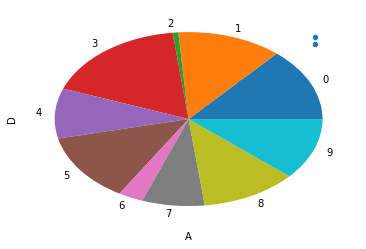

In [61]:
# 可视化示例
df1 = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('2018/12/18',periods=10), columns=list('ABCD'))
df1.plot()
df2 = pd.DataFrame(np.random.rand(10,4),columns=['A','B','C','D'])
df2.plot.bar()
df2.plot.bar(stacked=True) # 堆积条形图
df2.plot.barh(stacked=True) # 水平条形图
df2.plot.hist(bins=20)
df2.hist(bins=20) #列绘制不同的直方图
df2.plot.box()
df2.plot.area()
df2.plot.scatter(x='A', y='C')
df2['D'].plot.pie(subplots=True)

#### Pandas其他相关函数应用
|函数|函数作用|形式|
|:--|:--|:--|
|pipe()|可以通过将函数和适当数量的参数作为管道参数来执行自定义函数对DataFrame进行操作|df.piper ( function, perp )|
|apply()|apply()方法沿DataFrame或Panel的轴应用任意函数，它与描述性统计方法一样，采用可选的轴参数|df.apply(np.mean,axis=1)|
|reindex()|采用可选参数方法，它是一个填充方法|df.reindex( index= , columns= ) <br/>df2.reindex_like( df1, method='ffill' )<br/>pad/ffill - 向前填充值；bfill/backfill - 向后填充值；nearest - 从最近的索引值填充|
|rename()|允许基于一些映射(字典或者系列)或任意函数来重新标记一个轴|df.rename( index= , columns=  )|
|isnull()|检查缺失值||
|notnull()|检查缺失值||
|fillna()|函数可以通过几种方法用非空数据“填充”NA值|df.fillna(number) 用标量值替换NaN<br/>df.fillna(method='pad') 填写NA前进和后退method=pad/fill /bfill/backfill|
|dropna()|如果行内的任何值是NA，那么整个行被排除|df.dropna(axis=0/1 )|

In [24]:
# 其他相关函数应用示例
def adder(ele1,ele2):
    return ele1+ele2
df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.pipe(adder,2) # 传入自定义函数adder，和参数2；为df中的所有元素相加一个值2
'1----------------------------------------------------------------------------------'
df.apply(np.mean)
df.apply(np.mean,axis=1)
df.apply(lambda x: x.max() - x.min()) 
'2----------------------------------------------------------------------------------'
# 重构数据框
df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])
df_reindexed = df1.reindex(index=[0,2,3], columns=['col1','col2']) #重构数据框
df2.reindex_like(df1) # 重建索引与df2对象对齐
df2.reindex_like(df1,method='ffill') # 重构与df1一致的数据框，并向前填充 
df2.reindex_like(df1,method='ffill',limit=1) # 重构与df1一致的数据框，向前填充，重建索引时的填充限制
'3----------------------------------------------------------------------------------'
df.rename(columns={'col1' : 'c1', 'col2' : 'c2'},index = {0 : 'apple', 1 : 'banana', 2 : 'durian'})
'4----------------------------------------------------------------------------------'
# NAN值处理
df3=df_reindexed.reindex_like(df1)
df3
df3['col1'].isnull()
df3['col1'].notnull()
df3.fillna(0)
df3.fillna(method='pad')
df3.fillna(method='pad').dropna(axis=1)

,col1,col2,col3
0,0.490731,0.926610,2.269177
1,1.154097,2.823656,2.141345
2,1.475614,2.054501,1.195006
3,1.984239,2.726985,2.644600
4,1.836258,2.737405,1.790489


'1----------------------------------------------------------------------------------'

col1   -0.611812
col2    0.253831
col3    0.008124
dtype: float64

0   -0.771160
1    0.039699
2   -0.424960
3    0.451941
4    0.121384
dtype: float64

col1    1.493508
col2    1.897046
col3    1.449594
dtype: float64

'2----------------------------------------------------------------------------------'

,col1,col2,col3
0,-2.311801,0.782469,0.696058
1,-1.351515,-0.019053,1.087809
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


,col1,col2,col3
0,-2.311801,0.782469,0.696058
1,-1.351515,-0.019053,1.087809
2,-1.351515,-0.019053,1.087809
3,-1.351515,-0.019053,1.087809
4,-1.351515,-0.019053,1.087809
5,-1.351515,-0.019053,1.087809


,col1,col2,col3
0,-2.311801,0.782469,0.696058
1,-1.351515,-0.019053,1.087809
2,-1.351515,-0.019053,1.087809
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


'3----------------------------------------------------------------------------------'

,c1,c2,col3
apple,-1.509269,-1.073390,0.269177
banana,-0.845903,0.823656,0.141345
durian,-0.524386,0.054501,-0.804994
3,-0.015761,0.726985,0.644600
4,-0.163742,0.737405,-0.209511


'4----------------------------------------------------------------------------------'

,col1,col2,col3
0,-0.321847,0.838906,NaN
1,NaN,NaN,NaN
2,1.113037,-1.161580,NaN
3,-0.256907,-1.525070,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


0    False
1     True
2    False
3    False
4     True
5     True
Name: col1, dtype: bool

0     True
1    False
2     True
3     True
4    False
5    False
Name: col1, dtype: bool

,col1,col2,col3
0,-0.321847,0.838906,0.0
1,0.000000,0.000000,0.0
2,1.113037,-1.161580,0.0
3,-0.256907,-1.525070,0.0
4,0.000000,0.000000,0.0
5,0.000000,0.000000,0.0


,col1,col2,col3
0,-0.321847,0.838906,NaN
1,-0.321847,0.838906,NaN
2,1.113037,-1.161580,NaN
3,-0.256907,-1.525070,NaN
4,-0.256907,-1.525070,NaN
5,-0.256907,-1.525070,NaN


,col1,col2
0,-0.321847,0.838906
1,-0.321847,0.838906
2,1.113037,-1.161580
3,-0.256907,-1.525070
4,-0.256907,-1.525070
5,-0.256907,-1.525070


#### Pandas读取外部数据
|读取函数|函数作用|
|:--|:--|
|pd.read_csv(filename)|导入CSV文档|
|pd.read_table(filename)|导入分隔的文本文件 (如TSV)|
|pd.read_excel(filename)|导入Excel文档|
|pd.read_sql(query, connection_object)|读取SQL 表/数据库|
|pd.read_json(json_string)|读取JSON格式的字符串, URL或文件.|
|pd.read_html(url)|解析html URL，字符串或文件，并将表提取到数据框列表|
|pd.read_clipboard()|获取剪贴板的内容并将其传递给read_table（）|
|写入函数|函数作用|
|df.to_csv(filename)|写入CSV文件|
|df.to_excel(filename)|写入Excel文件|
|df.to_sql(table_name, connection_object)|写入一个SQL表|
|df.to_json(filename)|写入JSON格式的文件|
|以上函数具体参数用法自行查阅||